In [1]:
#!pip install -q wot

Read in expression matrix, cell days, initial cell growth rates, and keep serum cells only

In [2]:
import wot
import matplotlib.pyplot as plt

VAR_GENE_DS_PATH = 'data/ExprMatrix.var.genes.loom'
GROWTH_SCORES_PATH = 'data/growth_gs_init.txt'
CELL_DAYS_PATH = 'data/cell_days.txt'
SERUM_CELL_IDS_PATH = 'data/serum_cell_ids.txt'

adata = wot.io.read_dataset(VAR_GENE_DS_PATH, obs=[CELL_DAYS_PATH, GROWTH_SCORES_PATH], obs_filter=SERUM_CELL_IDS_PATH)

In [3]:
adata.shape

(175472, 1479)

Initialize OT model

In [3]:
ot_model = wot.ot.OTModel(adata, growth_iters=3) 

Compute a single transport map from day 7 to 7.5

In [5]:
tmap_adata = ot_model.compute_transport_map(7,7.5)

The object tmap_adata is an annotated transport matrix. 
The actual transport matrix is tmap_adata.X

tmap_adata.obs encodes the cell barcodes at time t0 and tmap_adata.var encodes the cell barcodes at time t1.

In [6]:
tmap_adata.obs

,g0,g1,g2,g3
id,,,,
D7_Dox_C1_AAACCTGAGGAATCGC-1,1.501791,1.146698,0.898083,0.716977
D7_Dox_C1_AAACCTGAGTAGATGT-1,2.989438,2.519022,2.138184,1.831273
D7_Dox_C1_AAACCTGCAACCGCCA-1,1.699754,1.632623,1.551593,1.464766
D7_Dox_C1_AAACCTGCACTATCTT-1,3.079174,2.796191,2.522094,2.269747
D7_Dox_C1_AAACCTGCAGCCTGTG-1,1.014346,0.908838,0.807164,0.713977
D7_Dox_C1_AAACCTGCATATACGC-1,1.245687,1.212259,1.163718,1.107669
D7_Dox_C1_AAACCTGCATCCGTGG-1,1.100886,1.069408,1.025115,0.972373
D7_Dox_C1_AAACCTGTCGGAATCT-1,1.088761,1.155697,1.201567,1.231339
D7_Dox_C1_AAACGGGGTAGTACCT-1,0.416973,0.442948,0.462499,0.476865


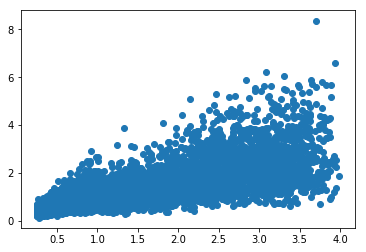

In [7]:
plt.scatter(tmap_adata.obs['g0'],tmap_adata.obs['g3'])

Compute another transport map from day 7.5 to 8

In [8]:
tmap_adata = ot_model.compute_transport_map(7.5, 8)

Compute all transport maps and save to disk

In [ ]:
ot_model.compute_all_transport_maps(tmap_out='tmaps/serum')